In [196]:
import perceval as pcvl
pcvl.__version__

import numpy as np
import matplotlib.pyplot as plt
from perceval.components.unitary_components import PS, BS, PERM 

## Use the symbolic skin for display
from perceval.rendering.circuit import DisplayConfig, SymbSkin
DisplayConfig.select_skin(SymbSkin)

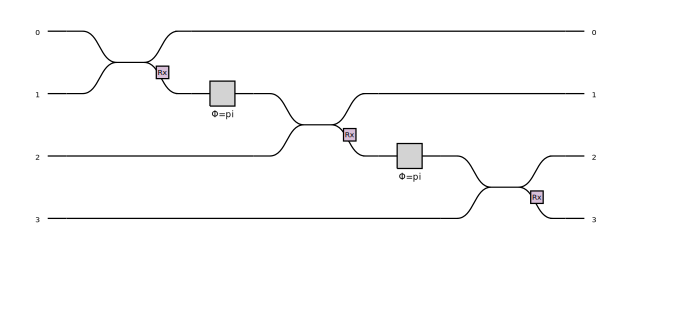

In [197]:
#Circuit definition
circuit = pcvl.Circuit(4) // (0,BS()) // (1,PS(phi=pcvl.P('phi'))) // (1,BS()) // (2,PS(phi=pcvl.P('phi2'))) // (2,BS())

#Set parameters values
params=circuit.get_parameters()
params[0].set_value(np.pi)
params[1].set_value(np.pi)

pcvl.pdisplay(circuit)

/tmp/ipykernel_21236/1789257449.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(list(simulator.allstateprob_iterator(bs1)))


|3,0,0,0> : 0.0
|2,1,0,0> : 0.0
|2,0,1,0> : 0.062499999999999944
|2,0,0,1> : 0.06249999999999996
|1,2,0,0> : 7.70371977754894e-34
|1,1,1,0> : 0.12499999999999994
|1,1,0,1> : 0.12499999999999994
|1,0,2,0> : 0.12499999999999997
|1,0,1,1> : 8.474091755303828e-33
|1,0,0,2> : 0.12499999999999994
|0,3,0,0> : 1.091360301819434e-33
|0,2,1,0> : 0.07812500000000007
|0,2,0,1> : 0.07812500000000007
|0,1,2,0> : 0.031249999999999993
|0,1,1,1> : 2.4074124304840445e-33
|0,1,0,2> : 0.031249999999999986
|0,0,3,0> : 0.05859375000000002
|0,0,2,1> : 0.019531249999999986
|0,0,1,2> : 0.01953125000000001
|0,0,0,3> : 0.05859374999999999


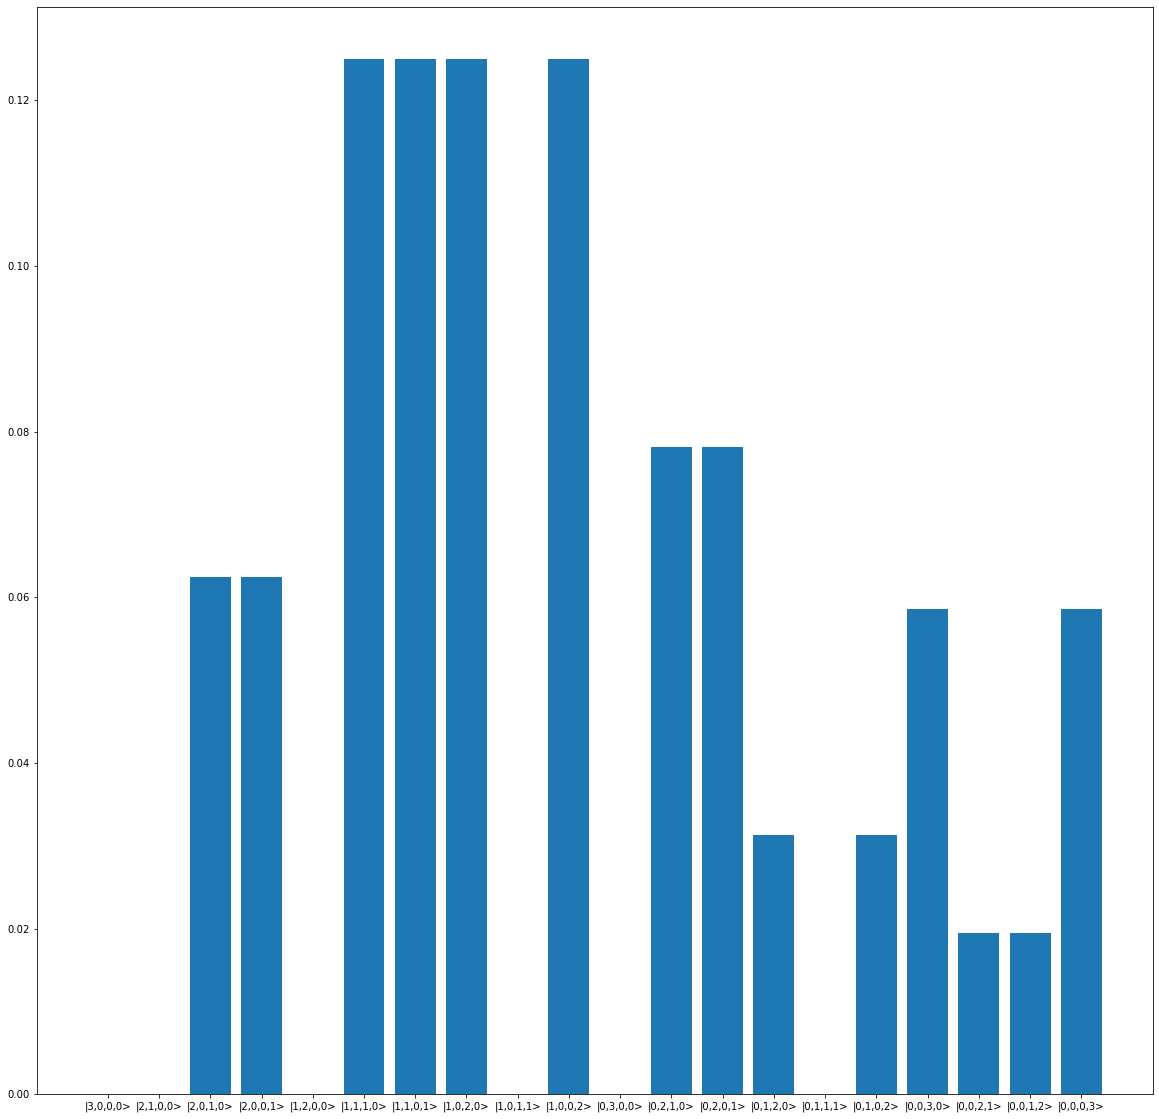

In [202]:
#Input state
bs1 = pcvl.StateVector('|0,1,1,1>') + pcvl.StateVector('|0,2,0,1>')

#Compute output probas
backend = pcvl.BackendFactory.get_backend("Naive") 
simulator = backend(circuit)
res = np.array(list(simulator.allstateprob_iterator(bs1)))
idx = [str(i) for i in res[:,0]]

plt.figure(figsize=(20,20))
plt.bar(idx,res[:,1])
plt.plot()

for state, prob in res:
    print("{} : {}".format(state,prob))